In [ ]:
# needs to be 580 x 1440
# lon: -180, 180
# lat: -60, 85

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### pop - have 2010, 2015, 2020 - interp for others

In [3]:
path = '/nfs/a68/earlacoa/population/count/v4.11/2010-2020'

In [17]:
pop_2010 = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/gpw_v4_population_count_rev11_2010_0.25deg_crop.nc')
pop_2015 = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/gpw_v4_population_count_rev11_2015_0.25deg_crop.nc')
pop_2020 = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/gpw_v4_population_count_rev11_2020_0.25deg_crop.nc')

In [18]:
pop_2010 = pop_2010.expand_dims(time=pd.date_range("2010", periods=1, freq='Y'))
pop_2015 = pop_2015.expand_dims(time=pd.date_range("2015", periods=1, freq='Y'))
pop_2020 = pop_2020.expand_dims(time=pd.date_range("2020", periods=1, freq='Y'))

In [22]:
pop = xr.concat([pop_2010, pop_2015, pop_2020], dim='time')

In [29]:
for year in range(2011, 2020):
    year = str(year)
    if year != '2015':
        pop.interp(time=year).to_netcdf(f'{path}/gpw_v4_population_count_rev11_{year}_0.25deg_crop.nc')

6,827,686,684.161443
6,827,970,073.639403
6,931,407,233.094596
7,035,127,782.027743
7,138,564,941.482936
7,345,155,870.915361
7,345,506,660.02964
7,473,895,475.855187
7,601,933,502.566458
7,729,971,529.277724
7,986,047,582.70026


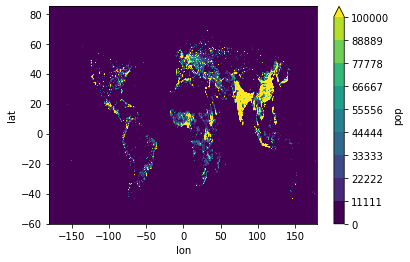

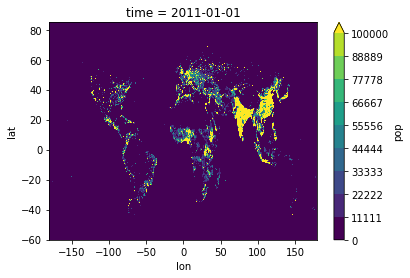

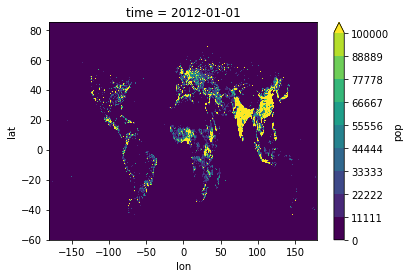

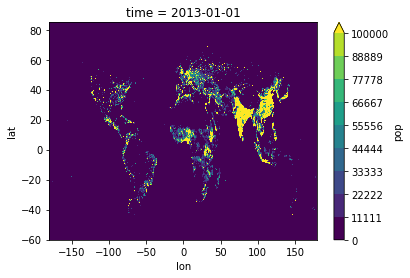

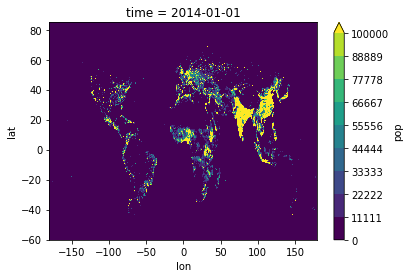

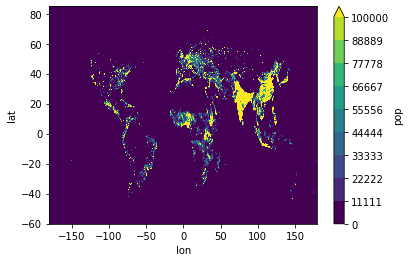

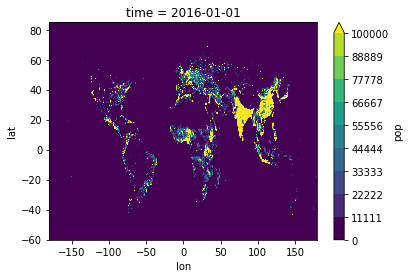

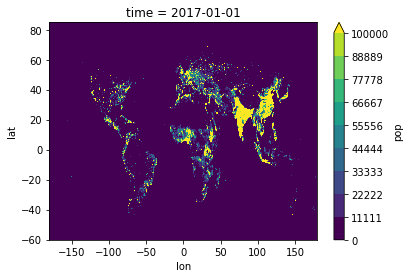

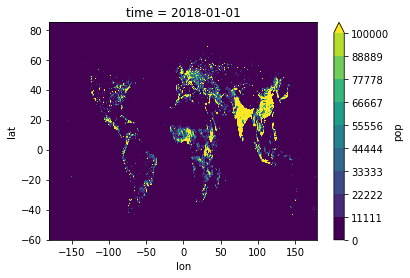

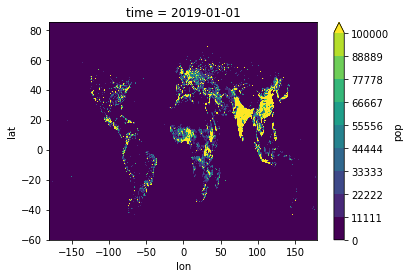

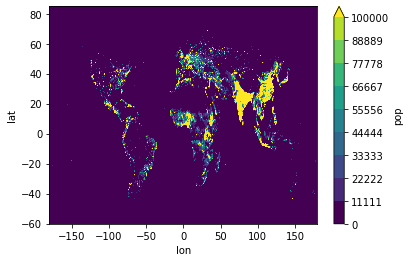

In [58]:
for year in range(2010, 2021):
    year = str(year)
    with xr.open_dataset(f'{path}/gpw_v4_population_count_rev11_{year}_0.25deg_crop.nc') as ds:
        print(f'{ds.pop.sum().values:,}')
        fig = plt.figure();
        ds.pop.plot(levels=np.linspace(0, 100_000, 10));

### age - have 2010-2019 - interp for 2020

In [31]:
# interp for 2020 age
ds_years = []

for year in range(2010, 2020):
    year = str(year)
    with xr.open_dataset(f'/nfs/a68/earlacoa/health/GBD2019/GBD2019_population_{year}_0.25deg.nc') as ds:
        ds_year = ds.expand_dims(time=pd.date_range(year, periods=1, freq='Y'))
        ds_years.append(ds_year)
        
        
ds_years_concat = xr.concat(ds_years, dim='time')

In [32]:
ds_years_concat.interp(time='2020', kwargs={"fill_value": "extrapolate"}).to_netcdf(f'/nfs/a68/earlacoa/health/GBD2019/GBD2019_population_2020_0.25deg.nc')

19,365.779508790853
19,556.22628364787
19,700.139850867836
19,751.7855474873
19,756.598905088435
19,678.75781239414
19,446.354746983456
19,079.492863793726
18,627.58701478956
18,148.62008377814
18,147.307845610983


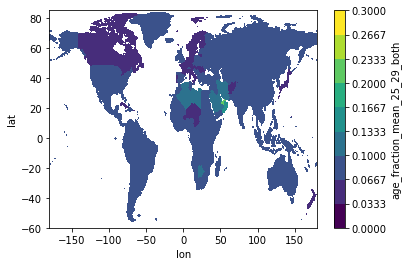

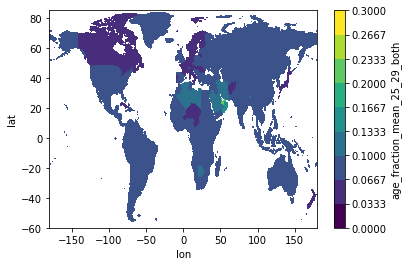

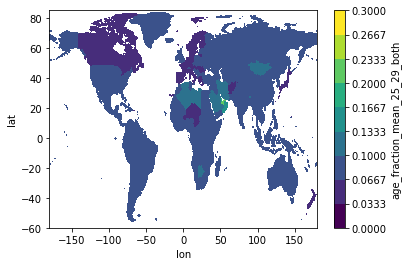

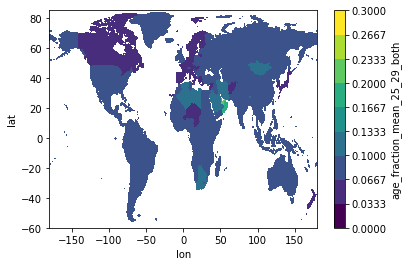

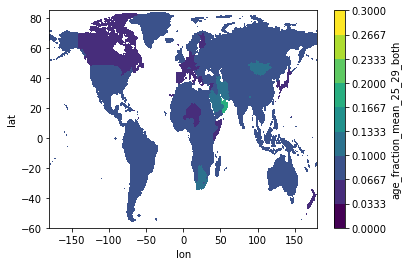

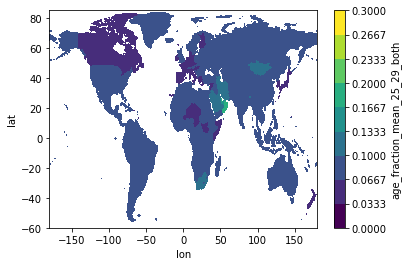

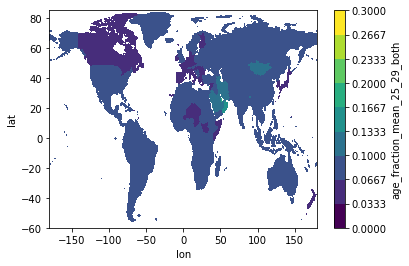

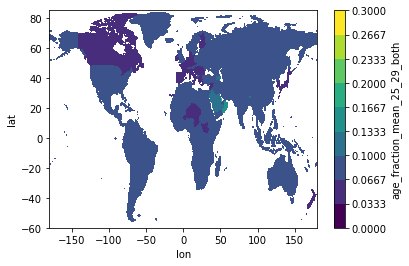

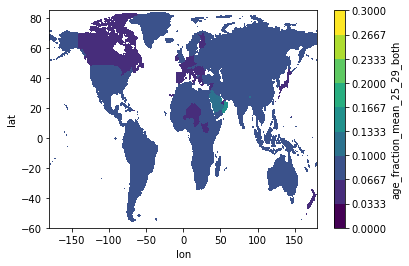

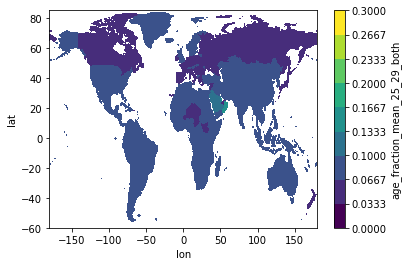

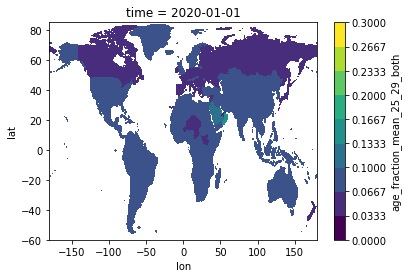

In [33]:
for year in range(2010, 2021):
    year = str(year)
    with xr.open_dataset(f'/nfs/a68/earlacoa/health/GBD2019/GBD2019_population_{year}_0.25deg.nc') as ds:
        print(f'{ds.age_fraction_mean_25_29_both.sum().values:,}')
        fig = plt.figure();
        ds.age_fraction_mean_25_29_both.plot(levels=np.linspace(0, 0.3, 10));

### bm extrapolate for 2020

In [34]:
measures = ['mort', 'yld', 'yll']
outcomes = ['lri', 'ncd', 'copd']
metrics = ['mean', 'upper', 'lower']

for measure in measures:
    for outcome in outcomes:
        for metric in metrics:
            ds_years = []
            for year in range(2010, 2020):
                year = str(year)
                with xr.open_dataset(f'/nfs/a68/earlacoa/health/GBD2019/GBD2019_baseline_mortality_{measure}_{outcome}_both_{metric}_{year}_0.25deg.nc') as ds:
                    ds_year = ds.expand_dims(time=pd.date_range(year, periods=1, freq='Y'))
                    ds_years.append(ds_year)


            ds_years_concat = xr.concat(ds_years, dim='time')
            ds_years_concat.interp(time='2020', kwargs={"fill_value": "extrapolate"}).to_netcdf(f'/nfs/a68/earlacoa/health/GBD2019/GBD2019_baseline_mortality_{measure}_{outcome}_both_{metric}_2020_0.25deg.nc')

In [35]:
metric, outcome, metric

('lower', 'copd', 'lower')

79.18680321035103
76.1547085409791
73.48950010943949
71.6467715956337
70.27384603026252
68.06817207389626
66.65062677422952
65.69365975535506
66.66492592062555
66.97863268129892
66.97949215187612


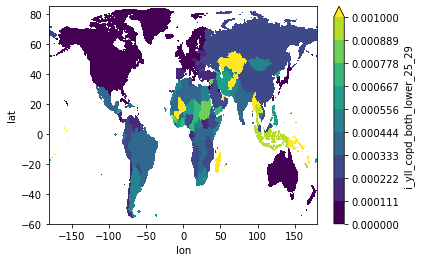

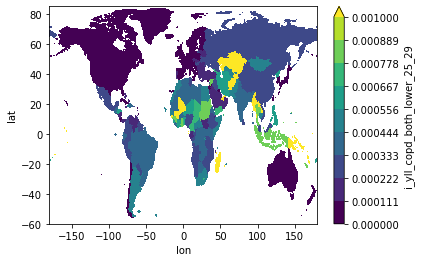

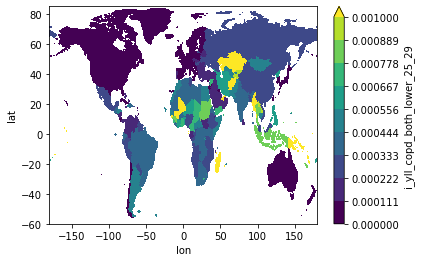

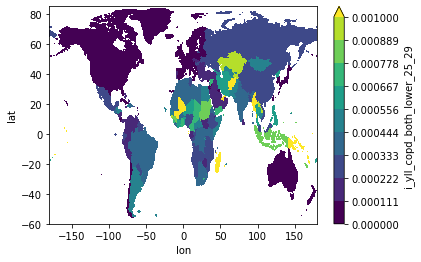

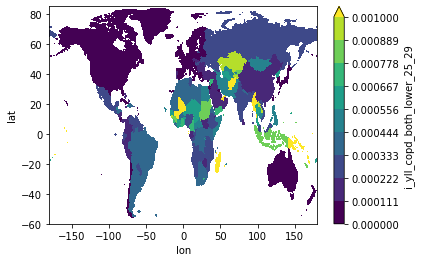

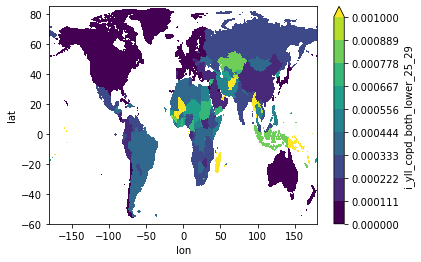

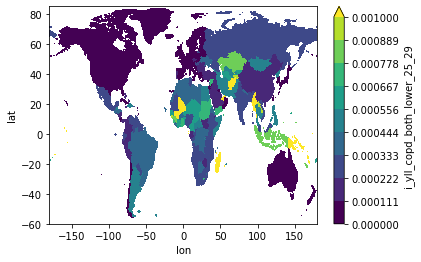

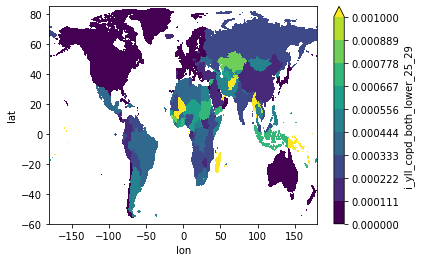

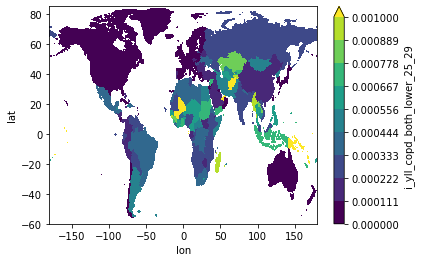

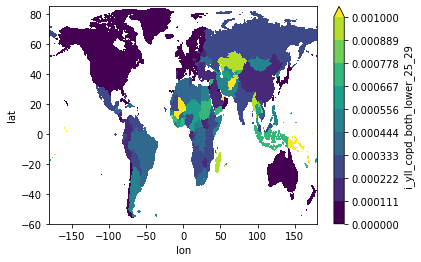

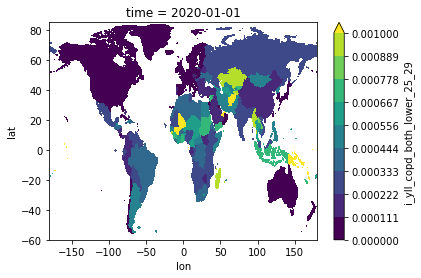

In [41]:
for year in range(2010, 2021):
    year = str(year)
    with xr.open_dataset(f'/nfs/a68/earlacoa/health/GBD2019/GBD2019_baseline_mortality_{measure}_{outcome}_both_{metric}_{year}_0.25deg.nc') as ds:
        key = f"i_{measure}_{outcome}_both_{metric}_25_29"
        print(f'{ds[key].sum().values:,}')
        fig = plt.figure();
        ds[key].plot(levels=np.linspace(0, 0.001, 10));